<a href="https://colab.research.google.com/github/chaitanyav23/Pinnacle-Full-Stacks-Intern/blob/main/E_commerce_Customer_Segregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [20]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/E-commerce Customer Behavior - Sheet1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
missing_values = df.isnull().sum()
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
duplicate_rows = initial_rows - df.shape[0]
df.drop(columns=['Customer ID'],inplace=True)

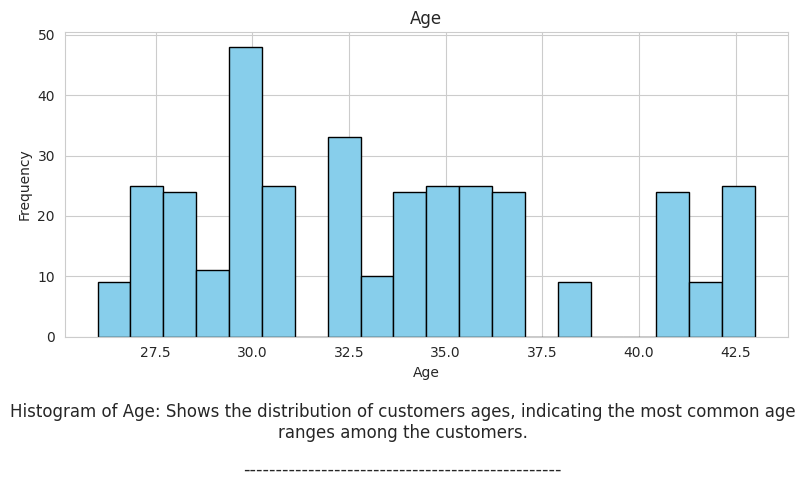

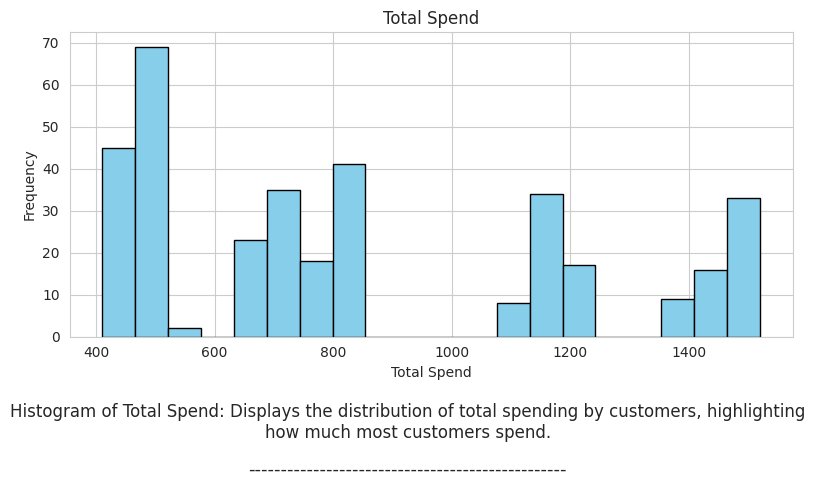

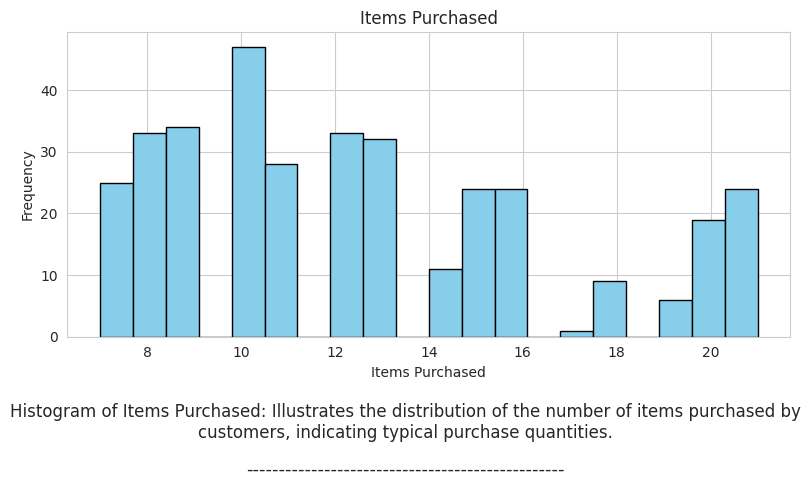

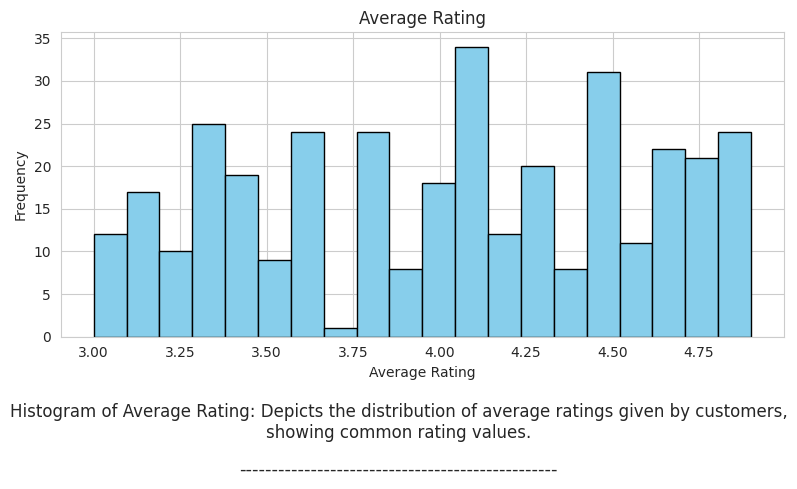

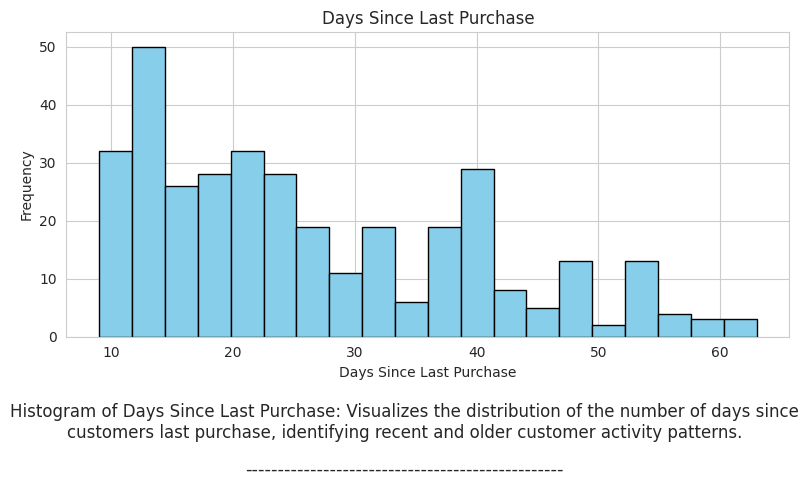

In [46]:
# Univariate analysis for numeric columns
numeric_columns = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

descriptions = {
    'Age': 'Shows the distribution of customers ages, indicating the most common age ranges among the customers.',
    'Total Spend': 'Displays the distribution of total spending by customers, highlighting how much most customers spend.',
    'Items Purchased': 'Illustrates the distribution of the number of items purchased by customers, indicating typical purchase quantities.',
    'Average Rating': 'Depicts the distribution of average ratings given by customers, showing common rating values.',
    'Days Since Last Purchase': 'Visualizes the distribution of the number of days since customers last purchase, identifying recent and older customer activity patterns.'
}

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)
    plt.figtext(0.5, -0.1, f'Histogram of {col}: {descriptions[col]}', wrap=True, horizontalalignment='center', fontsize=12)

    plt.figtext(0.5, -0.2,f'-------------------------------------------------', wrap=True, horizontalalignment='center', fontsize=13)

    plt.tight_layout()
    plt.show()


<Figure size 1500x1000 with 0 Axes>

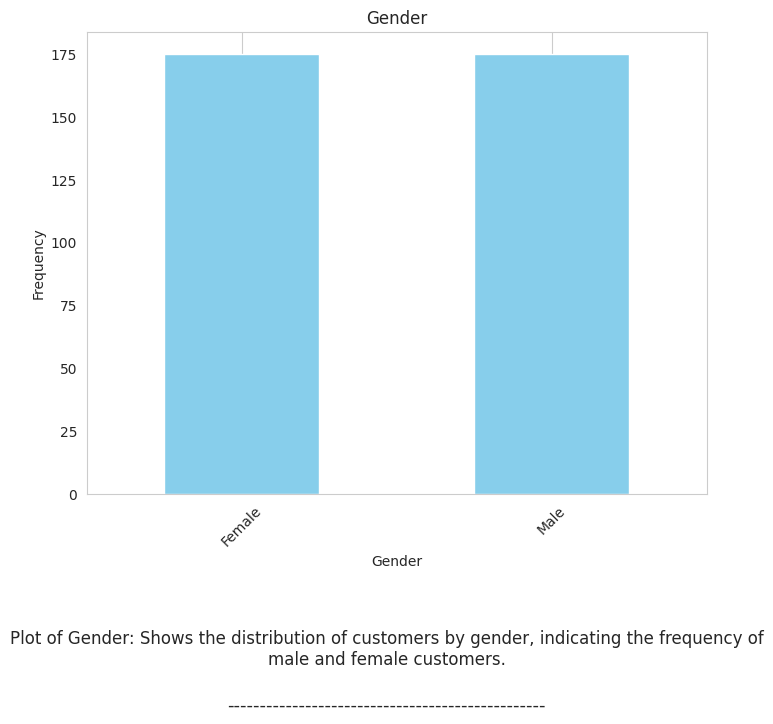

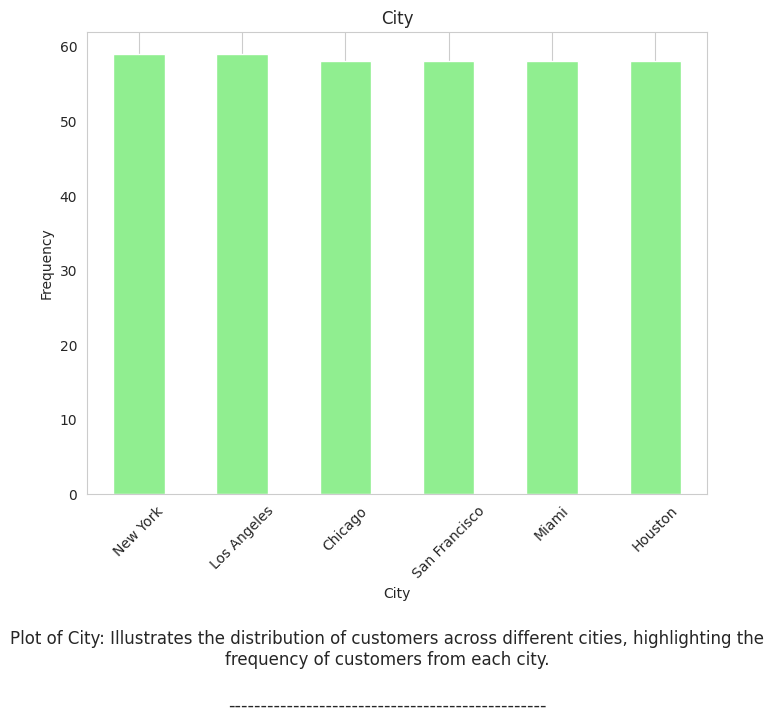

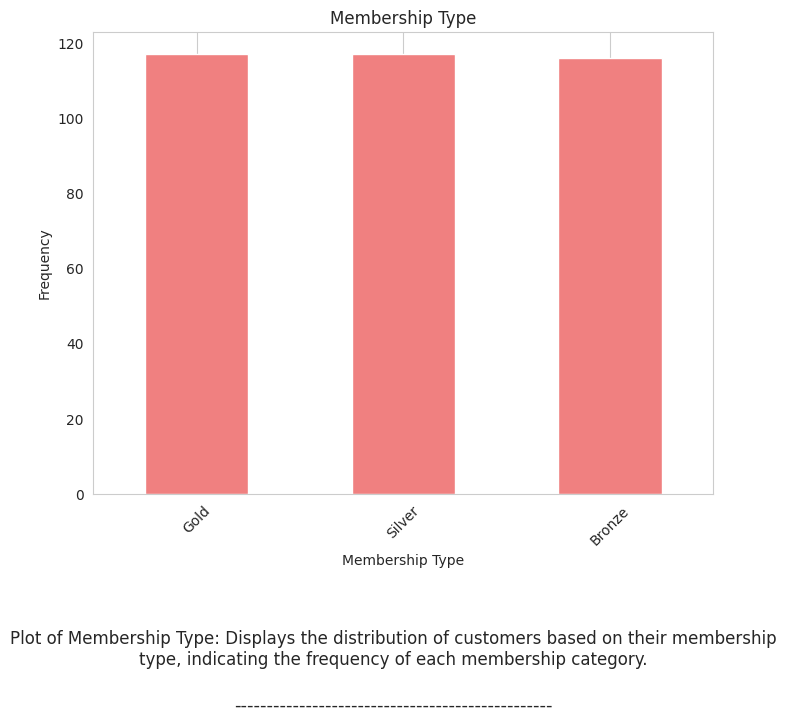

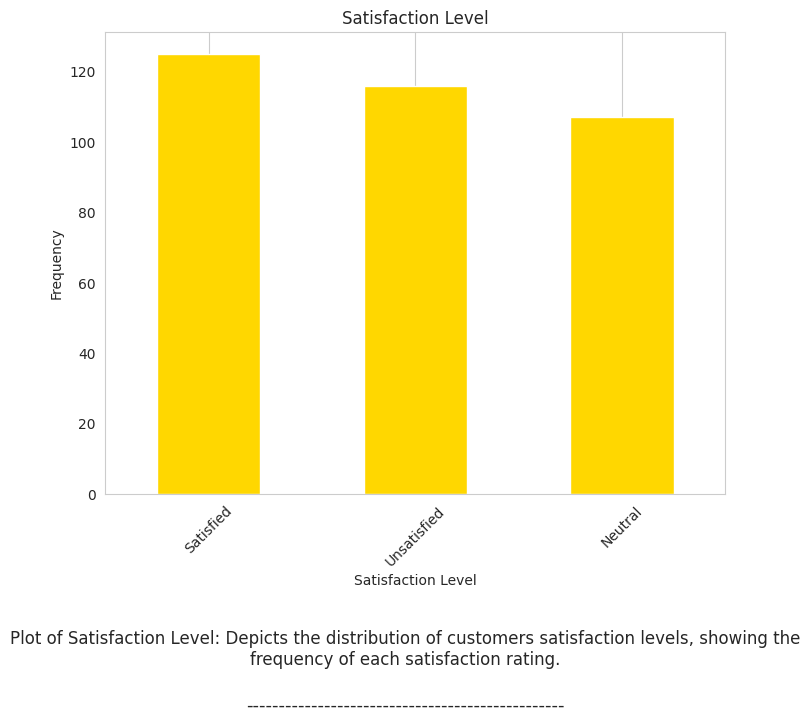

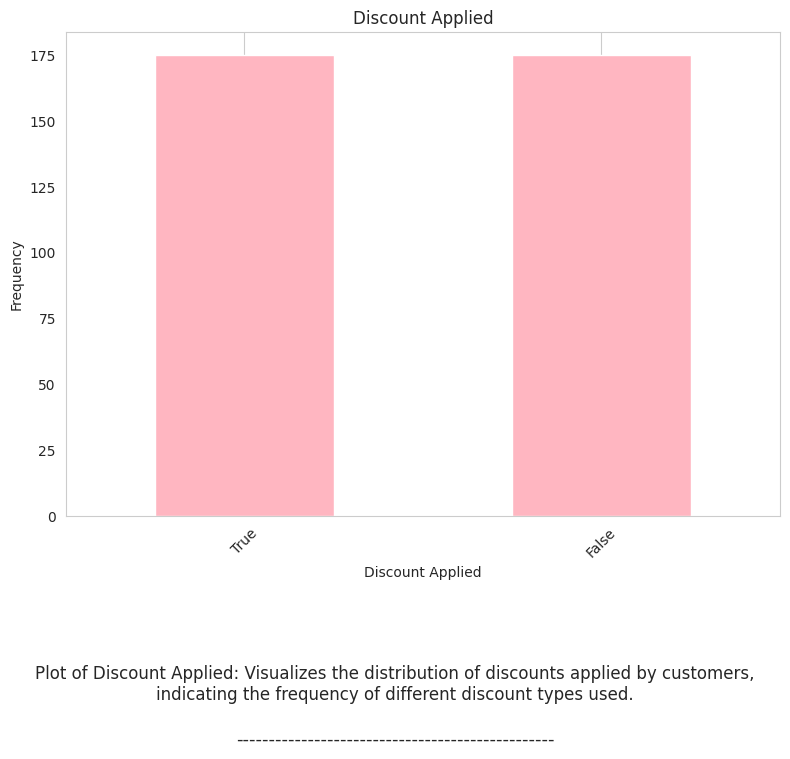

In [58]:
# Univariate analysis for categorical columns
categorical_columns = ['Gender', 'City', 'Membership Type', 'Satisfaction Level', 'Discount Applied']

# Define colors for bars
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink']

descriptions ={
    'Gender': 'Shows the distribution of customers by gender, indicating the frequency of male and female customers.',
    'City': 'Illustrates the distribution of customers across different cities, highlighting the frequency of customers from each city.',
    'Membership Type': 'Displays the distribution of customers based on their membership type, indicating the frequency of each membership category.',
    'Satisfaction Level': 'Depicts the distribution of customers satisfaction levels, showing the frequency of each satisfaction rating.',
    'Discount Applied':'Visualizes the distribution of discounts applied by customers, indicating the frequency of different discount types used.'

}

# Count plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar', color=colors[i-1])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.figtext(0.5, -0.17, f'Plot of {col}: {descriptions[col]}', wrap=True, horizontalalignment='center', fontsize=12)
    plt.figtext(0.5, -0.25,f'-------------------------------------------------', wrap=True, horizontalalignment='center', fontsize=13)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

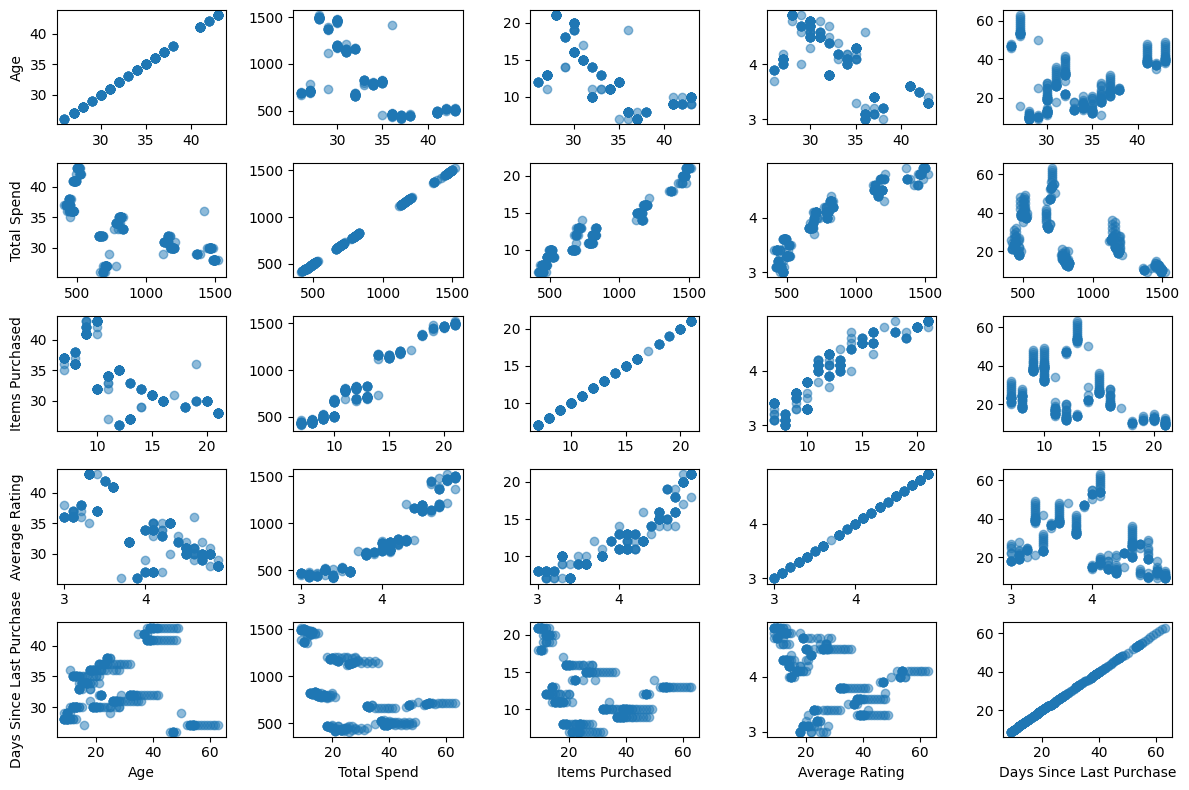

In [ ]:
# Bivariate analysis: Scatter plot for numeric columns
numeric_columns = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
plt.figure(figsize=(12, 8))
for i, col1 in enumerate(numeric_columns, 1):
    for j, col2 in enumerate(numeric_columns, 1):
        plt.subplot(5, 5, (i-1)*5 + j)
        plt.scatter(df[col1], df[col2], alpha=0.5)
        if i == 5:
            plt.xlabel(col2)
        if j == 1:
            plt.ylabel(col1)
plt.tight_layout()
plt.show()

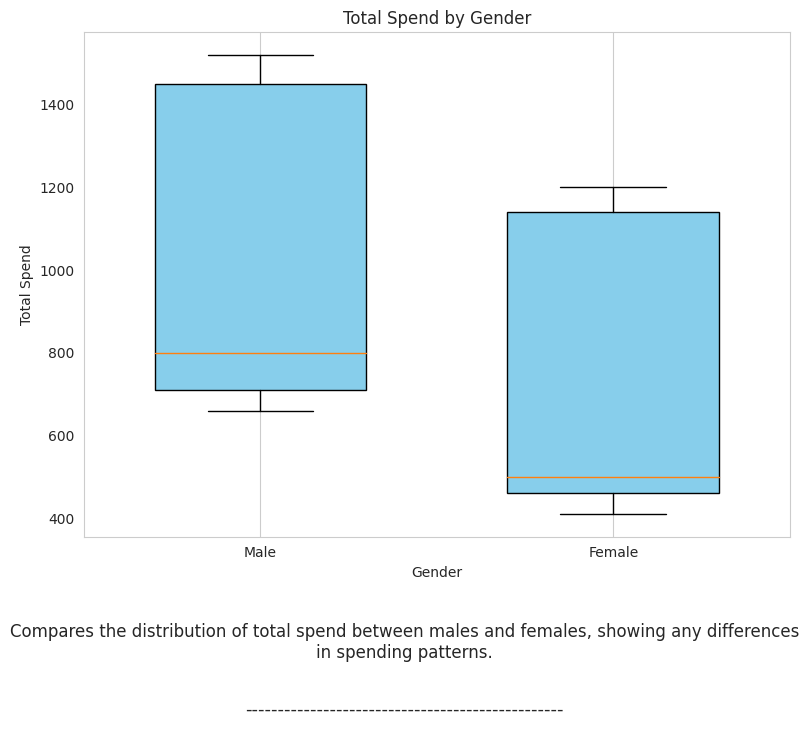

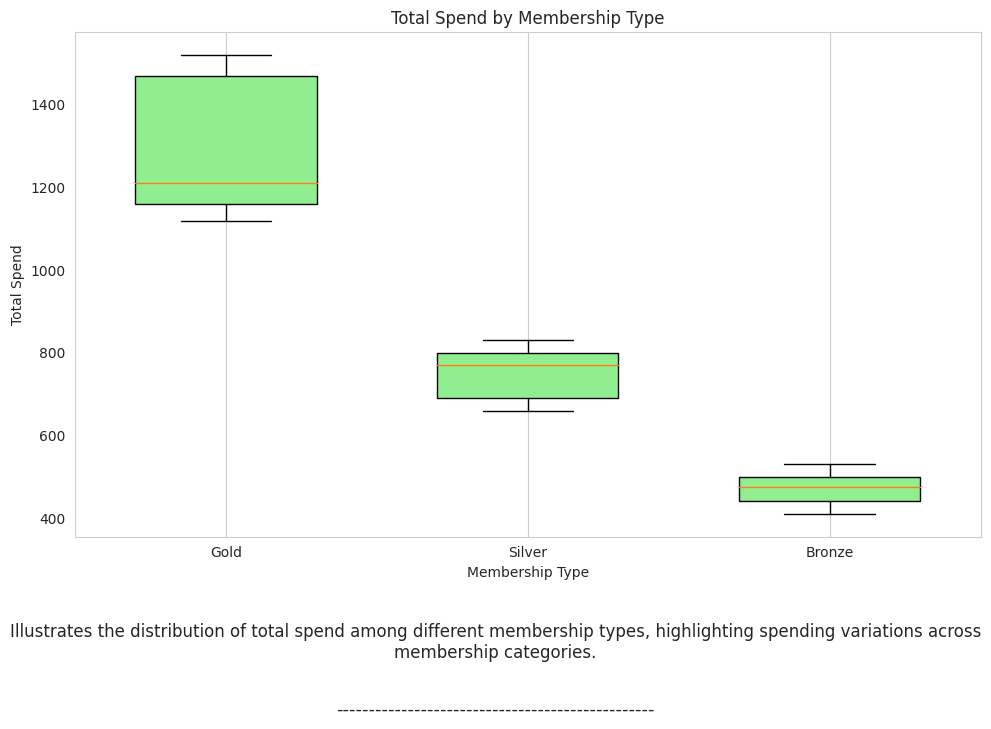

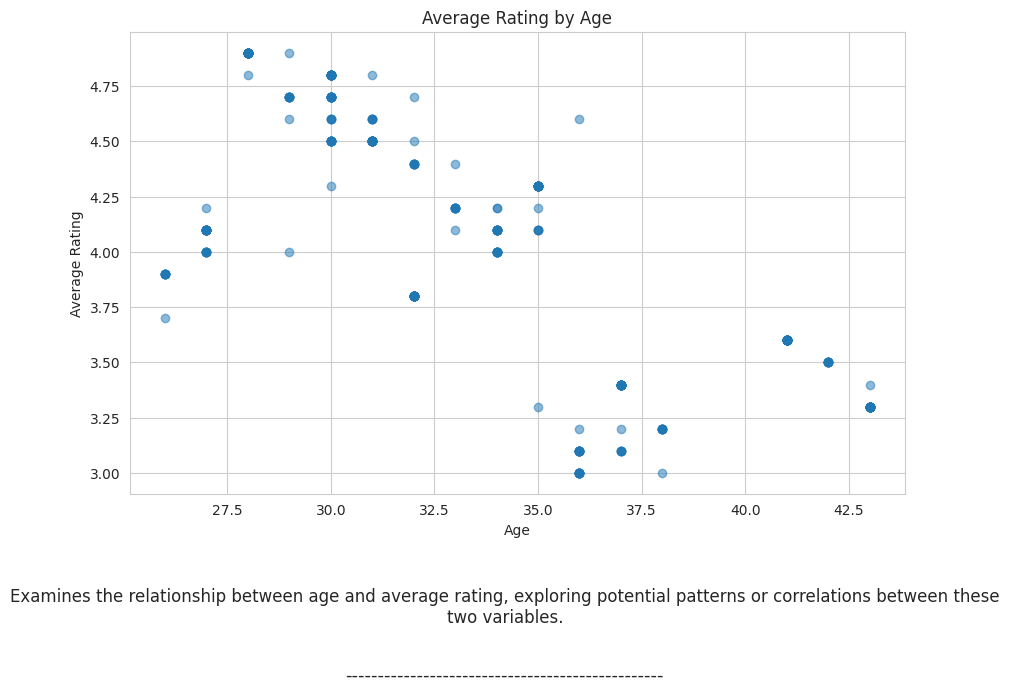

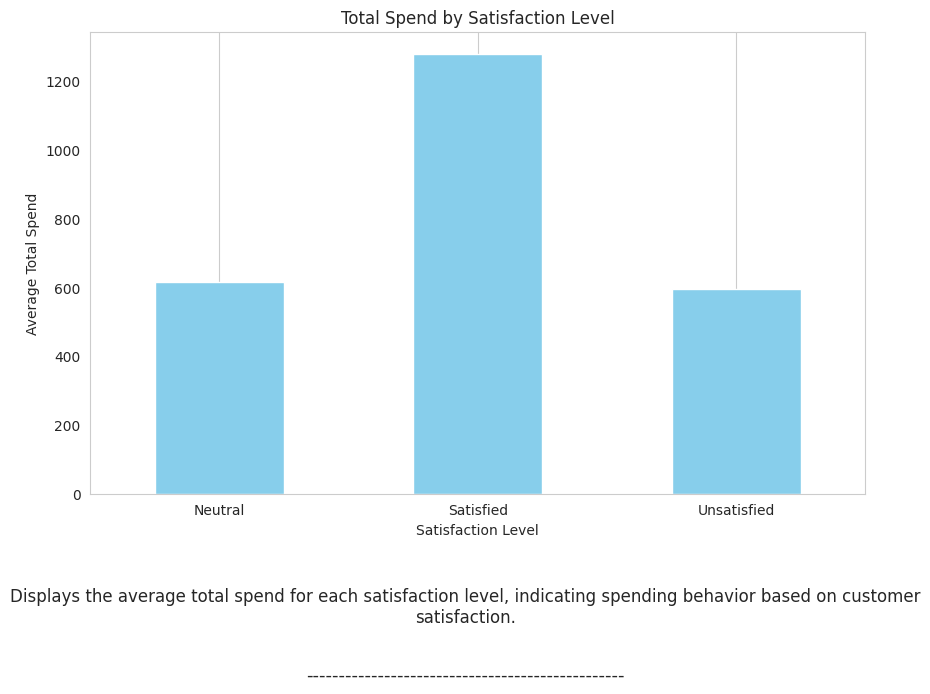

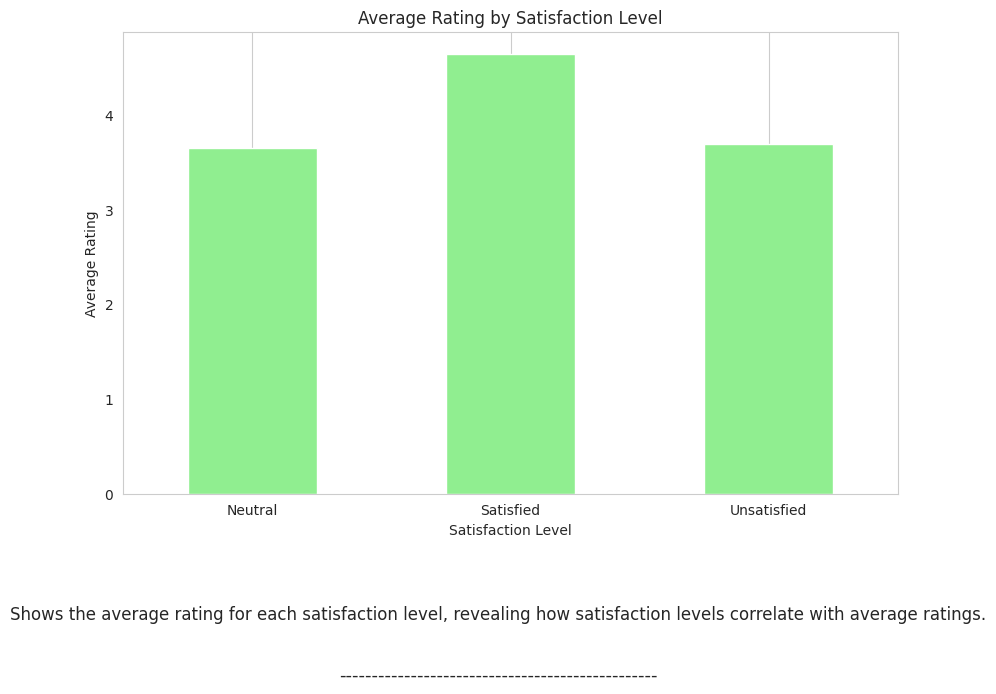

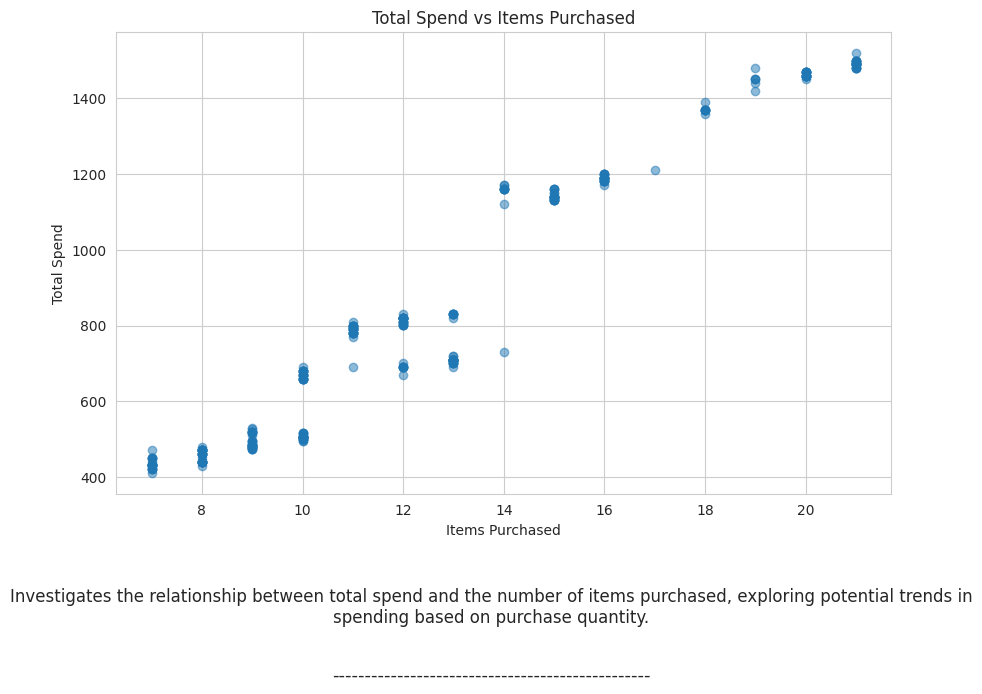

<Figure size 1000x600 with 0 Axes>

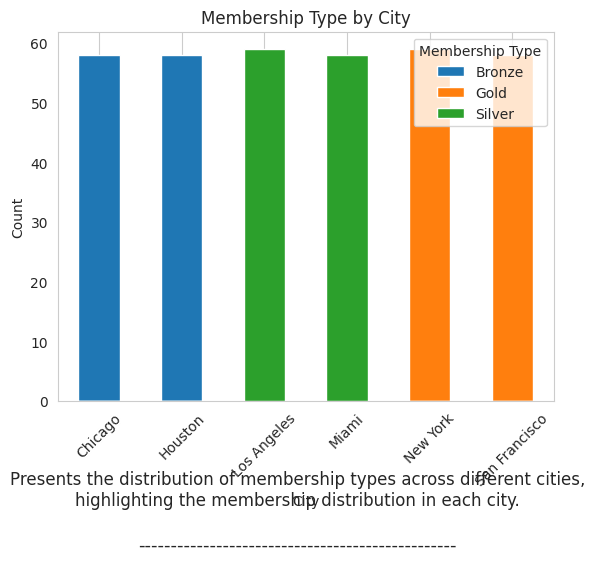

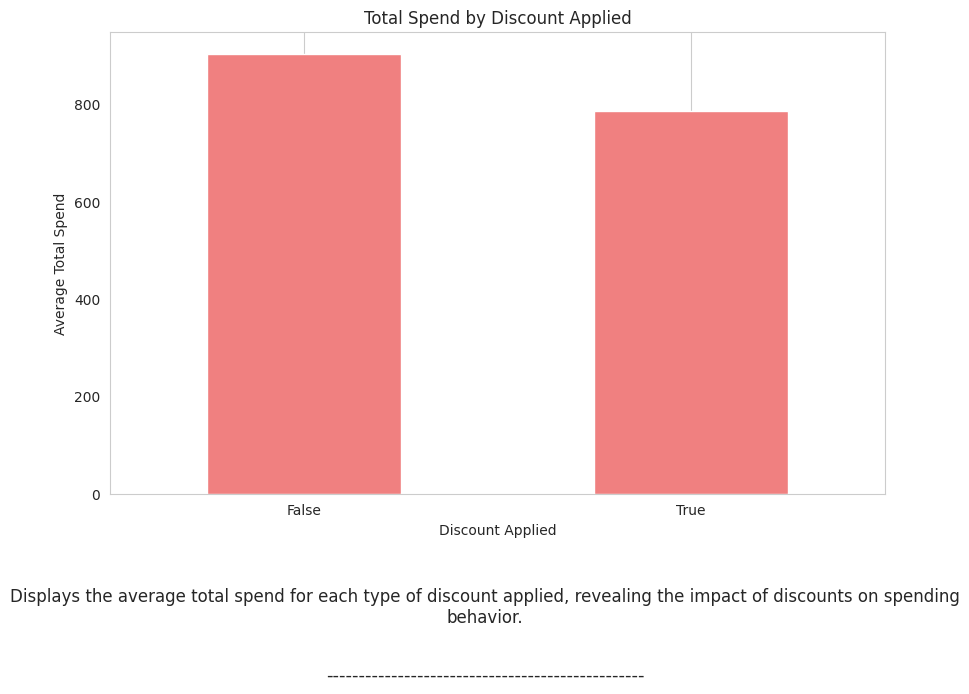

<Figure size 1000x600 with 0 Axes>

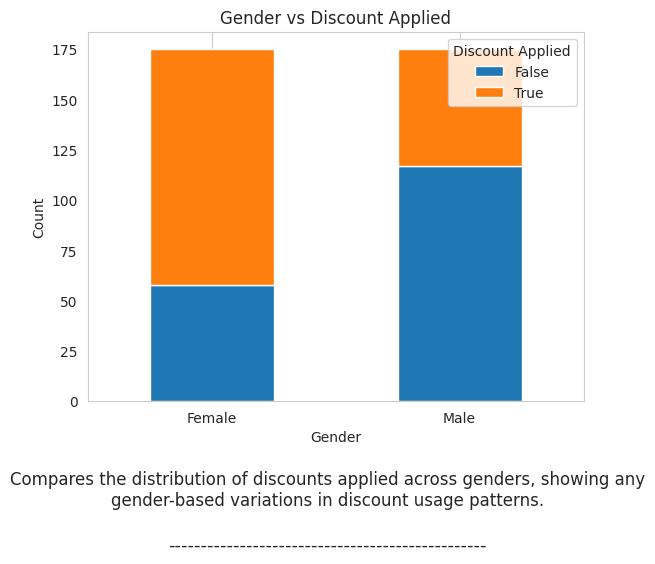

In [61]:
plt.figure(figsize=(8, 6))
positions = [1, 2]  # Positions for 'Male' and 'Female'
for i, gender in enumerate(['Male', 'Female'], start=1):
    plt.boxplot(df[df['Gender'] == gender]['Total Spend'], positions=[positions[i-1]], widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xticks(positions, ['Male', 'Female'])
plt.title('Total Spend by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spend')
plt.grid(axis='y')
plt.figtext(0.5, -0.1, f'Compares the distribution of total spend between males and females, showing any differences in spending patterns.', wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(0.5, -0.2,f'-------------------------------------------------', wrap=True, horizontalalignment='center', fontsize=13)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
positions = {}
membership_types = df['Membership Type'].unique()
for i, membership_type in enumerate(membership_types, start=1):
    positions[membership_type] = i
    plt.boxplot(df[df['Membership Type'] == membership_type]['Total Spend'], positions=[i], widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xticks(range(1, len(membership_types) + 1), membership_types)
plt.title('Total Spend by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Total Spend')
plt.grid(axis='y')
plt.figtext(0.5, -0.1, f'Illustrates the distribution of total spend among different membership types, highlighting spending variations across membership categories.', wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(0.5, -0.2,f'-------------------------------------------------', wrap=True, horizontalalignment='center', fontsize=13)
plt.tight_layout()
plt.show()

# Average rating by age
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Average Rating'], alpha=0.5)
plt.title('Average Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.figtext(0.5, -0.1, f'Examines the relationship between age and average rating, exploring potential patterns or correlations between these two variables.', wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(0.5, -0.2,f'-------------------------------------------------', wrap=True, horizontalalignment='center', fontsize=13)
plt.grid(True)
plt.show()

# Total spend by satisfaction
plt.figure(figsize=(10, 6))
df.groupby('Satisfaction Level')['Total Spend'].mean().plot(kind='bar', color='skyblue')
plt.title('Total Spend by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Total Spend')
plt.xticks(rotation=0)
plt.figtext(0.5, -0.1, f'Displays the average total spend for each satisfaction level, indicating spending behavior based on customer satisfaction.', wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(0.5, -0.2,f'-------------------------------------------------', wrap=True, horizontalalignment='center', fontsize=13)
plt.grid(axis='y')
plt.show()

# Average rating by satisfaction
plt.figure(figsize=(10, 6))
df.groupby('Satisfaction Level')['Average Rating'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Rating by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.figtext(0.5, -0.1, f'Shows the average rating for each satisfaction level, revealing how satisfaction levels correlate with average ratings.', wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(0.5, -0.2,f'-------------------------------------------------', wrap=True, horizontalalignment='center', fontsize=13)
plt.grid(axis='y')
plt.show()

# Total spend vs items purchased
plt.figure(figsize=(10, 6))
plt.scatter(df['Items Purchased'], df['Total Spend'], alpha=0.5)
plt.title('Total Spend vs Items Purchased')
plt.xlabel('Items Purchased')
plt.ylabel('Total Spend')
plt.figtext(0.5, -0.1, f'Investigates the relationship between total spend and the number of items purchased, exploring potential trends in spending based on purchase quantity.', wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(0.5, -0.2,f'-------------------------------------------------', wrap=True, horizontalalignment='center', fontsize=13)
plt.grid(True)
plt.show()

# Membership type by city
plt.figure(figsize=(10, 6))
df.groupby(['City', 'Membership Type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Membership Type by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Membership Type')
plt.figtext(0.5, -0.1, f'Presents the distribution of membership types across different cities, highlighting the membership distribution in each city.', wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(0.5, -0.2,f'-------------------------------------------------', wrap=True, horizontalalignment='center', fontsize=13)
plt.grid(axis='y')
plt.show()

# Total spend by discount applied
plt.figure(figsize=(10, 6))
df.groupby('Discount Applied')['Total Spend'].mean().plot(kind='bar', color='lightcoral')
plt.title('Total Spend by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Average Total Spend')
plt.xticks(rotation=0)
plt.figtext(0.5, -0.1, f'Displays the average total spend for each type of discount applied, revealing the impact of discounts on spending behavior.', wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(0.5, -0.2,f'-------------------------------------------------', wrap=True, horizontalalignment='center', fontsize=13)
plt.grid(axis='y')
plt.show()

# Gender vs discount applied
plt.figure(figsize=(10, 6))
df.groupby(['Gender', 'Discount Applied']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Gender vs Discount Applied')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Discount Applied', loc='upper right')
plt.figtext(0.5, -0.1, f'Compares the distribution of discounts applied across genders, showing any gender-based variations in discount usage patterns.', wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(0.5, -0.2,f'-------------------------------------------------', wrap=True, horizontalalignment='center', fontsize=13)
plt.grid(axis='y')
plt.show()


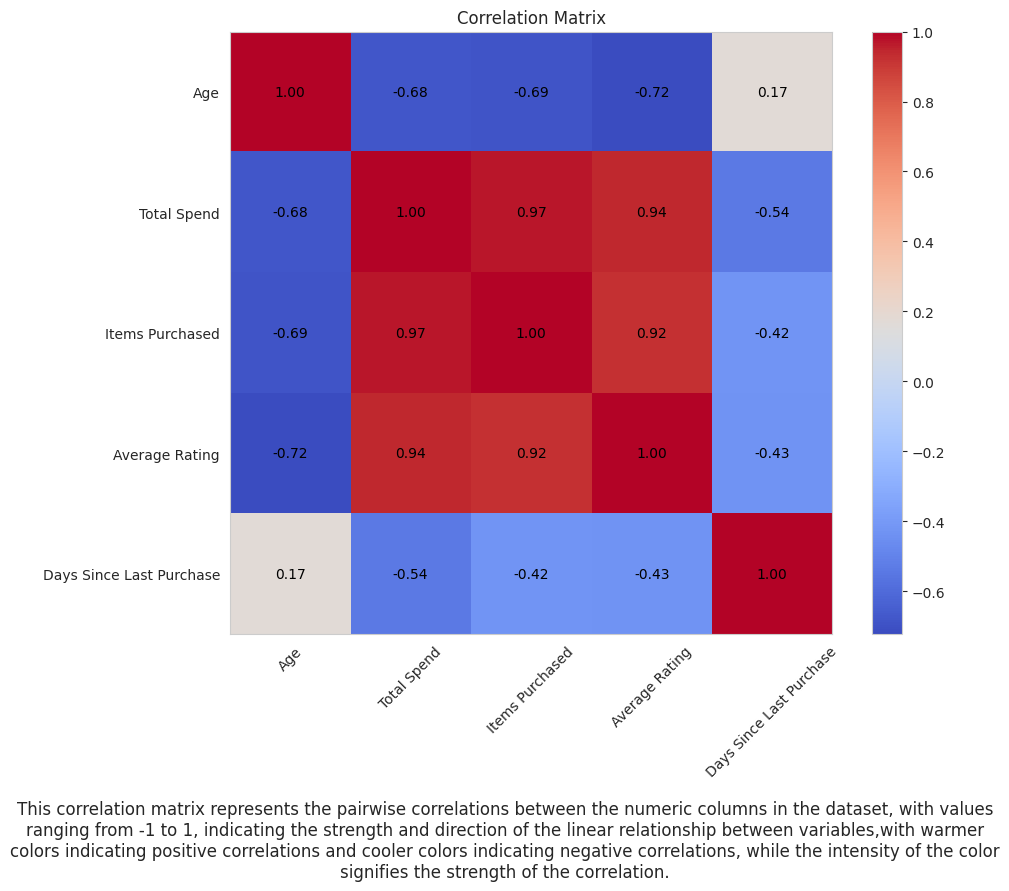

In [92]:
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=45)
plt.yticks(range(len(numeric_columns)), numeric_columns)
plt.title('Correlation Matrix')
plt.figtext(0.5, -0.1, f'This correlation matrix represents the pairwise correlations between the numeric columns in the dataset, with values ranging from -1 to 1, indicating the strength and direction of the linear relationship between variables,with warmer colors indicating positive correlations and cooler colors indicating negative correlations, while the intensity of the color signifies the strength of the correlation.', wrap=True, horizontalalignment='center', fontsize=12)
plt.grid(False)
plt.tight_layout()

# Add correlation values on the matrix
for i in range(len(numeric_columns)):
    for j in range(len(numeric_columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

In [ ]:
# Initialize label encoder
label_encoders = {}

label_columns = ['Satisfaction Level', 'Discount Applied', 'Gender', 'City', 'Membership Type']
for col in label_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,0,29,4,1,1120.20,14,4.6,1,25,1
1,1,34,2,2,780.50,11,4.1,0,18,0
2,0,43,0,0,510.75,9,3.4,1,42,2
3,1,30,5,1,1480.30,19,4.7,0,12,1
4,1,27,3,2,720.40,13,4.0,1,55,2
...,...,...,...,...,...,...,...,...,...,...
345,1,32,3,2,660.30,10,3.8,1,42,2
346,0,36,1,0,470.50,8,3.0,0,27,0
347,0,30,4,1,1190.80,16,4.5,1,28,1
348,1,34,2,2,780.20,11,4.2,0,21,0


In [ ]:
#initialise the scaler
scaler = StandardScaler()
#fit the data on the scaler and transform it
df_scaled = scaler.fit_transform(df)
#convert scaled data to dataframe
df = pd.DataFrame(df_scaled, columns=df.columns)
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,-1.0,-0.945152,0.878073,-0.003502,0.760130,0.337346,1.001981,1.0,-0.118359,-0.045768
1,1.0,0.082826,-0.294925,1.222126,-0.179459,-0.385538,0.139479,-1.0,-0.639907,-1.277971
2,-1.0,1.933185,-1.467924,-1.229130,-0.925570,-0.867461,-1.068024,1.0,1.148256,1.186436
3,1.0,-0.739557,1.464572,-0.003502,1.756144,1.542153,1.174482,-1.0,-1.086947,-0.045768
4,1.0,-1.356343,0.291574,1.222126,-0.345692,0.096385,-0.033022,1.0,2.116844,1.186436
...,...,...,...,...,...,...,...,...,...,...
345,1.0,-0.328365,0.291574,1.222126,-0.511924,-0.626500,-0.378022,1.0,1.148256,1.186436
346,-1.0,0.494017,-0.881425,-1.229130,-1.036899,-1.108422,-1.758026,-1.0,0.030654,-1.277971
347,-1.0,-0.739557,0.878073,-0.003502,0.955405,0.819269,0.829481,1.0,0.105161,-0.045768
348,1.0,0.082826,-0.294925,1.222126,-0.180289,-0.385538,0.311979,-1.0,-0.416386,-1.277971


In [ ]:
#scaling data is useful for clustering algos like k-means which are sensitive to the scale of input so each feature of our dataframe now has a mean of 0 and standard deviation of 1

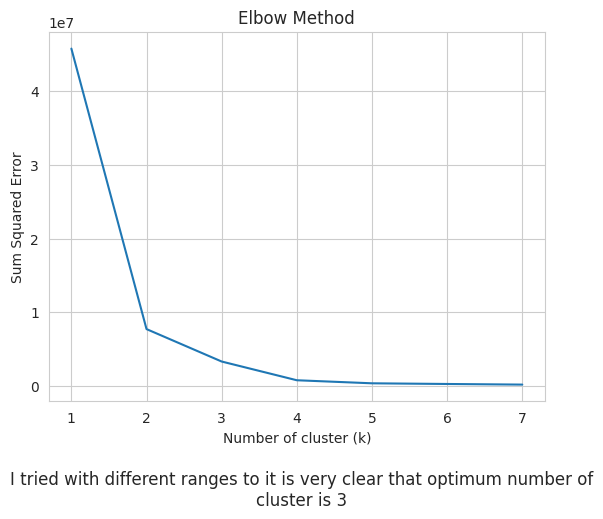

In [97]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
X = df[['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']]
for k in range(1,8):
	# Inside the loop where KMeans is created
  km = KMeans(n_clusters=k, random_state=2, n_init=10)
  km.fit(X)
  sse.append(km.inertia_)

sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,8), y=sse)

g.set(xlabel ="Number of cluster (k)",
	ylabel = "Sum Squared Error",
	title ='Elbow Method')
plt.figtext(0.52,-0.1,f'I tried with different ranges to it is very clear that optimum number of cluster is 3', wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

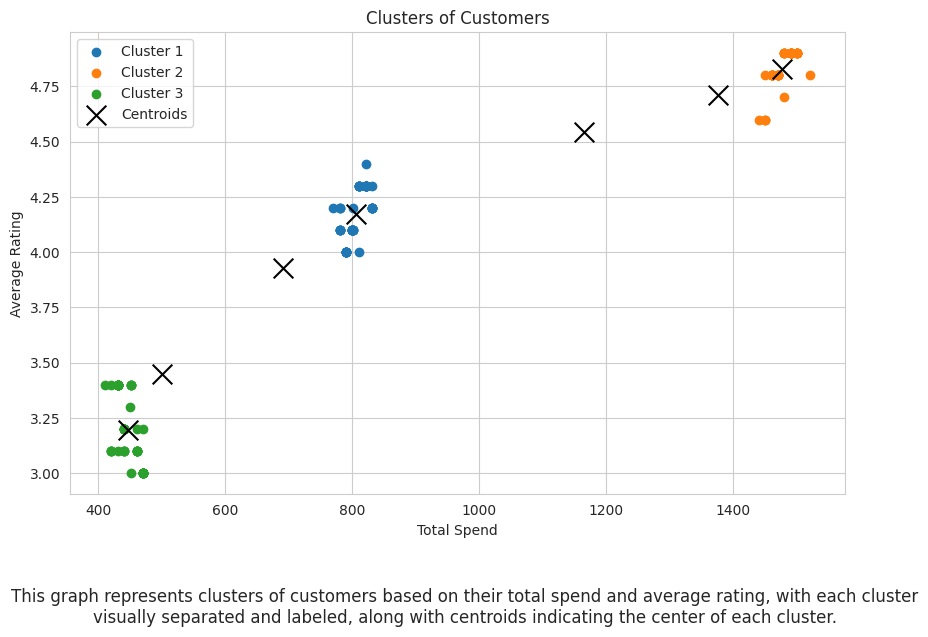

In [98]:
#Predict cluster labels for each data point
km.cluster_centers_
pred = km.fit_predict(X)
labels = km.labels_
df['Cluster'] = labels
# Plot the clusters along with the data points
plt.figure(figsize=(10, 6))

# Plot data points for each cluster separately
for i in range(3):
    plt.scatter(X[labels == i]['Total Spend'], X[labels == i]['Average Rating'], label=f'Cluster {i+1}')

# Plot cluster centers
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 3], marker='x', color='black', s=200, label='Centroids')

plt.xlabel('Total Spend')
plt.ylabel('Average Rating')
plt.title('Clusters of Customers')
plt.figtext(0.52,-0.1,f'This graph represents clusters of customers based on their total spend and average rating, with each cluster visually separated and labeled, along with centroids indicating the center of each cluster.', wrap=True, horizontalalignment='center', fontsize=12)
plt.legend()
plt.show()

In [ ]:
cluster_analysis=df.groupby('Cluster').mean()
cluster_analysis

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
Cluster,,,,,,,,,,
0,-0.966102,-0.593200,0.878073,-0.003502,0.884143,0.643653,0.905498,1.0,-0.148667,-0.045768
1,-1.000000,0.639351,-0.881425,-1.229130,-1.102190,-1.212285,-1.424922,-1.0,-0.285357,-1.150502
2,0.941176,-1.398672,0.291574,1.222126,-0.391915,0.039688,-0.002580,1.0,1.980979,1.186436
3,1.000000,-0.920339,1.464572,-0.003502,1.699366,1.783114,1.361853,-1.0,-1.148608,-0.045768
4,1.000000,-0.328365,0.291574,1.222126,-0.480808,-0.616459,-0.378022,1.0,0.598768,1.186436
5,-1.000000,1.731135,-1.467924,-1.229130,-0.955628,-0.767753,-0.969877,1.0,1.033926,1.186436
6,1.000000,0.107218,-0.294925,1.222126,-0.110334,-0.222175,0.265200,-1.0,-0.843222,-1.110893


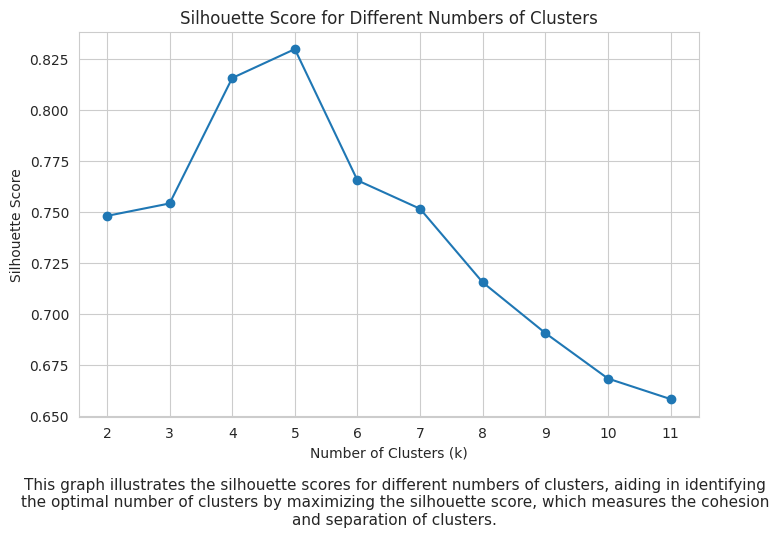

Optimal number of clusters based on silhouette score: 5
Silhouette score for optimal number of clusters: 0.8297882613770265


In [100]:
# Compute silhouette scores for different numbers of clusters
silhouette_scores = []
for k in range(2, 12):  # Assuming you want to test cluster numbers from 2 to 11
    km = KMeans(n_clusters=k, random_state=2, n_init=10)
    labels = km.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(range(2, 12))
plt.figtext(0.52,-0.1,f'This graph illustrates the silhouette scores for different numbers of clusters, aiding in identifying the optimal number of clusters by maximizing the silhouette score, which measures the cohesion and separation of clusters.', wrap=True, horizontalalignment='center', fontsize=11)
plt.grid(True)
plt.show()

# Find the optimal number of clusters with the maximum silhouette score
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters based on silhouette score:", optimal_k_silhouette)

optimal_silhouette_score = silhouette_scores[optimal_k_silhouette - 2]  # Subtract 2 to adjust index
print("Silhouette score for optimal number of clusters:", optimal_silhouette_score)

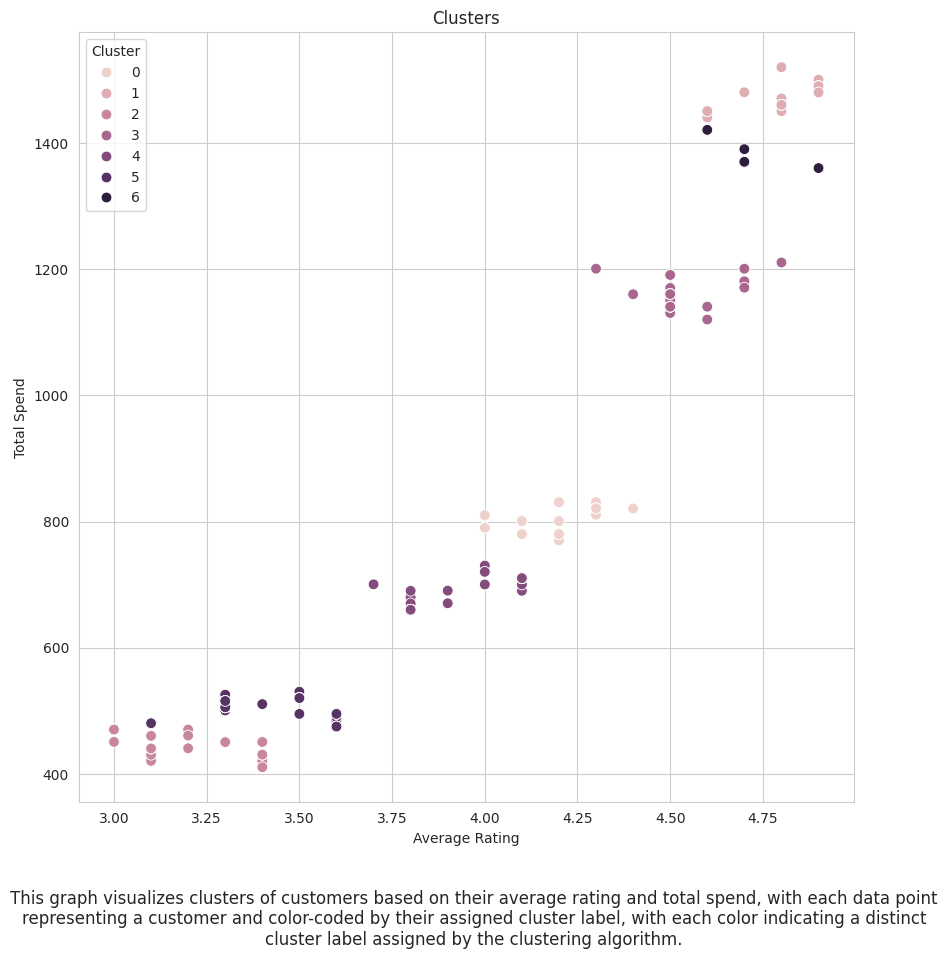

In [104]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Average Rating', y='Total Spend', s=60, data=df, hue='Cluster')
plt.title('Clusters')
plt.xlabel('Average Rating')
plt.ylabel('Total Spend')
plt.figtext(0.52,-0.03,f'This graph visualizes clusters of customers based on their average rating and total spend, with each data point representing a customer and color-coded by their assigned cluster label, with each color indicating a distinct cluster label assigned by the clustering algorithm.', wrap=True, horizontalalignment='center', fontsize=12)
plt.show()